In [28]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics

In [29]:
def createDataPoint(centroidLocation, numSamples, clusterDeviation):
    x,y = make_blobs(n_samples = numSamples, centers = centroidLocation, cluster_std = clusterDeviation)
    x = StandardScaler().fit_transform(x)
    return x, y    

In [30]:
x, y = createDataPoint([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

In [31]:
epsilon = 0.3
minimumSample = 7
DB = DBSCAN(eps = epsilon, min_samples = minimumSample).fit(x)
labels = DB.labels_
labels

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [32]:
# Firts, create an array of booleans using the labels from db
core_samples_mask = np.zeros_like(DB.labels_, dtype = bool)
core_samples_mask[DB.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [33]:
# Number of clusters in labels, ignoring noise if present.
n_cluster_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster_

3

In [34]:
# Remove repetition in labels by turning it into a set.
uniqueLable = set(labels)
uniqueLable

{-1, 0, 1, 2}

In [35]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(uniqueLable)))

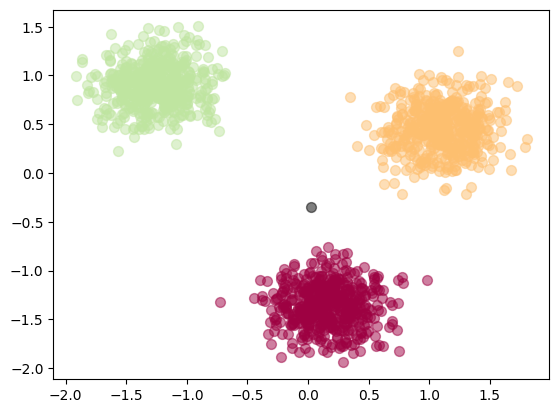

In [36]:
for k, col in zip(uniqueLable, colors):
    if k == -1:
        col = 'k'

        
    class_member_mask = (labels == k)    

    xy = x[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s = 50, c = [col], marker =u'o', alpha = 0.5)

    xy = x[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker=u'o', alpha = 0.5)

In [38]:
print(metrics.homogeneity_score(y, labels))

0.9999999999999998
